In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

colNames = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name" ]
car_data = pd.read_table("auto-mpg.data",names=colNames, delim_whitespace = True)
car_data.drop(["car_name"], inplace=True, axis=1)
car_data.describe()


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [2]:
car_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object

In [50]:
# From above description it is clear horsepower data has some issue
# Treating missing data, repalce with mean value
import numpy as np
car_data.horsepower.replace("?",np.NaN, inplace=True)
car_data.horsepower = car_data.horsepower.apply(pd.to_numeric)
car_data.horsepower.fillna(car_data.horsepower.mean(), inplace=True)
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


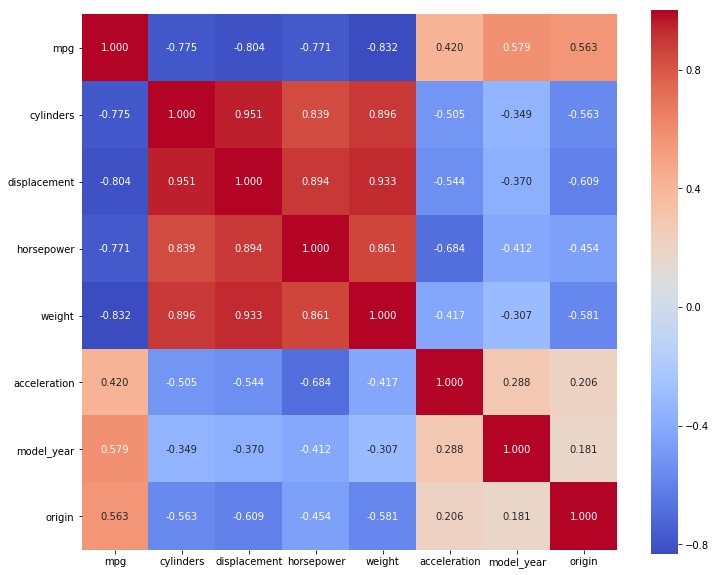

In [51]:
# To get an idea of how different attributes are correlated
import seaborn as sns

corr = car_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= list(car_data.columns.values), yticklabels= list(car_data.columns.values),
           cmap= 'coolwarm')
plt.show()

In [42]:
# As few features are highly correlated eg cylinders and displacement, cylinders and horsepower maybe we can reduce few features

feature_names = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
predictors = pd.DataFrame(data=car_data, columns=feature_names)
# target = pd.DataFrame(data=car_data, columns=["mpg"])
target = car_data.mpg

predictors.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [43]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 7) (80, 7) (318,) (80,)


In [45]:
from sklearn import linear_model
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
predict_outcome = model.predict(X_test)


In [47]:
# Mean squared error
MSE = np.mean((predict_outcome-y_test)**2)
Rsqr = model.score(X_test, y_test)
print("Model: \nCoeff: {} \nIntercpet:{}".format(model.coef_, model.intercept_))
print("MSE value: {}".format(MSE))
print("Coeff of Determination R^2: {}".format(Rsqr))


Model: 
Coeff: [-0.45968661  0.02087791 -0.00864401 -0.00704112  0.14654725  0.73177719
  1.47286115] 
Intercpet:-16.365733465132482
MSE value: 11.176190002869868
Coeff of Determination R^2: 0.8117034484548133


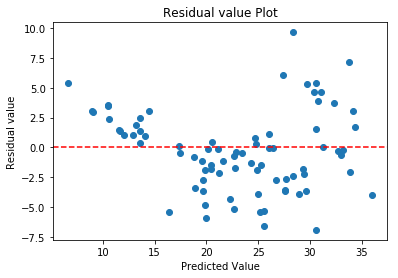

In [53]:
plt.scatter(predict_outcome, y_test - predict_outcome)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Value")
plt.ylabel("Residual value")
plt.title("Residual value Plot")

plt.show()

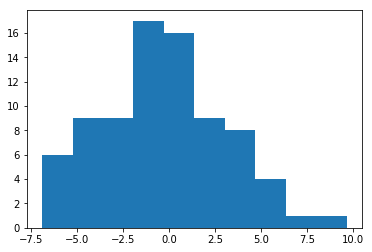

In [49]:
# Residuals value distribution
plt.hist(y_test - predict_outcome)

plt.show()